# Human Annotated NOTAM Analysis

Please note that the data for this analysis is saved locally in a `MatchingLaunchNOTAM_GMUCapstone_20220603` folder that is one level above (a parent folder) to where the [GitHub](https://github.com/DAEN-Team-1/Final "GitHub") files have been saved. This was done because a lot of the data files are too large to be included in the GitHub repoo.

In [1]:
# imports
import pandas as pd
# import bamboolib as bam

Read in data

In [55]:
# Read in csv (not enough headers for data, so using custom one)
names = ['LAUNCHES_REC_ID', 'NOTAM_REC_ID', 'LowerAltitude', 'UpperAltitude', 'IssueTime', 'StartTime', 'StopTime', 'E_CODE',
         '0_no_header', '1_no_header', '2_no_header', '3_no_header', '4_no_header', '5_no_header', '6_no_header', '7_no_header',
         '8_no_header', '9_no_header', '10_no_header', '11_no_header', '12_no_header', '13_no_header', '14_no_header']

date_cols = ['IssueTime', 'StartTime', 'StopTime']

df = pd.read_csv('../MatchingLaunchNOTAM_GMUCapstone_20220603/HumanAnnotatedMatches_SVO_DB_20200127.csv',
                 encoding='UTF-8', on_bad_lines='skip', engine="python", delimiter=',',
                 names=names) #, parse_dates=date_cols, infer_datetime_format=True)                

In [56]:
# Drop previous headers
df = df.drop(0)
df.reset_index(inplace=True, drop=True)

In [6]:
df.head()

,LAUNCHES_REC_ID,NOTAM_REC_ID,LowerAltitude,UpperAltitude,IssueTime,StartTime,StopTime,E_CODE,0_no_header,1_no_header,...,5_no_header,6_no_header,7_no_header,8_no_header,9_no_header,10_no_header,11_no_header,12_no_header,13_no_header,14_no_header
0,391,848687,0,50000,2018-04-01 11:24:00,2018-04-02 18:22:00,2018-04-02 21:08:00,WARNING AREA W497A ACT,None,None,...,None,None,None,None,None,None,None,None,None,None
1,391,835580,0,180000,2018-03-28 09:47:00,2018-04-02 19:52:00,2018-04-02 21:08:00,FL..AIRSPACE CAPE CANAVERAL FL..TEMPORARY FLT ...,FLT LIMITATION IN THE PROXIMITY OF SPACE FLT...,OPS BY FAA CERT PILOTS OR U.S.REG ACFT ARE PR...,...,R2934,AND PORTIONS OF W137F,W137G,W497A. ADDITIONAL WARNING AND RESTRICTED AREA...,None,None,None,None,None,None
2,391,835582,0,180000,2018-03-28 09:48:00,2018-04-02 19:52:00,2018-04-02 21:08:00,FL..AIRSPACE CAPE CANAVERAL FL..TEMPORARY FLT ...,FLT LIMITATION IN THE PROXIMITY OF SPACE FLT...,OPS BY FAA CERT PILOTS OR U.S.REG ACFT ARE PR...,...,R2934,AND PORTIONS OF W137F,W137G,W497A. ADDITIONAL WARNING AND RESTRICTED AREA...,None,None,None,None,None,None
3,391,848685,0,180000,2018-03-28 09:48:00,2018-04-02 19:52:00,2018-04-02 21:08:00,CAPE CANAVERAL FL..TEMPORARY FLT RESTRICTION....,FLT LIMITATION IN THE PROXIMITY OF SPACE FLT...,OPS BY FAA CERT PILOTS OR U.S.REG ACFT ARE PR...,...,R2934,AND PORTIONS OF W137F,W137G,W497A. ADDITIONAL WARNING AND RESTRICTED AREA...,None,None,None,None,None,None
4,391,848684,0,180000,2018-03-28 09:50:00,2018-04-02 19:52:00,2018-04-02 21:08:00,TEMPORARY FLT RESTRICTION. PURSUANT TO 14 CFR...,FLT LIMITATION IN THE PROXIMITY OF SPACE FLT...,OPS BY FAA CERT PILOTS OR U.S.REG ACFT ARE PR...,...,R2934,AND PORTIONS OF W137F,W137G,W497A. ADDITIONAL WARNING AND RESTRICTED AREA...,None,None,None,None,None,None


Look at df info
* Out of 23 columns, only 8 had headers in the spreadsheet. Need to analyze this to see why. 

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453 entries, 0 to 452
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   LAUNCHES_REC_ID  453 non-null    object
 1   NOTAM_REC_ID     453 non-null    object
 2   LowerAltitude    451 non-null    object
 3   UpperAltitude    428 non-null    object
 4   IssueTime        453 non-null    object
 5   StartTime        453 non-null    object
 6   StopTime         453 non-null    object
 7   E_CODE           453 non-null    object
 8   0_no_header      192 non-null    object
 9   1_no_header      189 non-null    object
 10  2_no_header      163 non-null    object
 11  3_no_header      161 non-null    object
 12  4_no_header      159 non-null    object
 13  5_no_header      158 non-null    object
 14  6_no_header      158 non-null    object
 15  7_no_header      155 non-null    object
 16  8_no_header      152 non-null    object
 17  9_no_header      41 non-null     ob

Look at longest row

In [12]:
df.iloc[141]

LAUNCHES_REC_ID                                                  263
NOTAM_REC_ID                                                   82263
LowerAltitude                                                      0
UpperAltitude                                                 180000
IssueTime                                        2016-08-16 09:15:00
StartTime                                        2016-08-19 02:47:00
StopTime                                         2016-08-19 06:23:00
E_CODE                      EROP D6556 ATTENTION AIRLINE DISPATCHERS
0_no_header         SOME OPERATORS APPEAR TO BE USING THE NOTAM B...
1_no_header         KZNY ARTCC/OAC &amp; TJZS ARTCC /OAC WILL NOT...
2_no_header                             50NM BETWEEN 6000W AND 5500W
3_no_header         AND 60NM EAST OF 5500W OR WITHIN AFFECTED WAR...
4_no_header        R2934 AND CFR 91.143 SFC-UNL. EFF: 1608190447 ...
5_no_header                                                     AR15
6_no_header                       

Descirbe the df
* Columsn with headers seem to be mostly filled (only `UpperAltitude` and `UpperAltitude` seem to be missing some values). 
* Columns that did not have headers are missing much more data. 

In [16]:
df.describe()

,LAUNCHES_REC_ID,NOTAM_REC_ID,LowerAltitude,UpperAltitude,IssueTime,StartTime,StopTime,E_CODE,0_no_header,1_no_header,...,5_no_header,6_no_header,7_no_header,8_no_header,9_no_header,10_no_header,11_no_header,12_no_header,13_no_header,14_no_header
count,452,452,450,427,452,452,452,452,192,189,...,158,158,155,152,41,2,1,1,1,1
unique,62,449,12,15,338,132,80,152,38,52,...,11,14,15,27,20,2,1,1,1,1
top,262,388267,0,180000,2016-08-16 12:03:00,2019-04-11 22:01:00,2016-08-17 01:30:00,W497A ACT,FLT LIMITATION IN THE PROXIMITY OF SPACE FLT...,OPS BY FAA CERT PILOTS OR U.S.REG ACFT ARE PR...,...,R2934,AND PORTIONS OF W137F,W137G,W497A. ADDITIONAL WARNING AND RESTRICTED AREA...,W137F AND W137G. ADDITIONAL WARNING AND RESTR...,GISSH,FRWAY,TUXXI,CAYSL EXPECT OMN J79 TRV AND TRV TRANSITION T...,SOME AIRLINE OPERATIONS ARE REROUTING FLIGHTS...
freq,18,3,341,184,7,11,18,74,69,43,...,99,66,68,57,7,1,1,1,1,1


## Column Analysis

#### LAUNCHES_REC_ID
* Included in NOTAM Analysis CSV, but all values were NaN. 
* Repeats, but none cover more than 4% of the data. 

In [13]:
df['LAUNCHES_REC_ID']

0      391
1      391
2      391
3      391
4      391
      ... 
447    300
448    300
449    300
450    300
451    300
Name: LAUNCHES_REC_ID, Length: 452, dtype: object

In [14]:
df['LAUNCHES_REC_ID'].value_counts()

262    18
456    13
400    13
355    12
312    12
       ..
510     3
359     3
301     2
514     2
511     2
Name: LAUNCHES_REC_ID, Length: 62, dtype: int64

In [15]:
df['LAUNCHES_REC_ID'].value_counts(dropna=False, normalize=True).apply(lambda x: '%.5f' % x)

262    0.03982
456    0.02876
400    0.02876
355    0.02655
312    0.02655
        ...   
510    0.00664
359    0.00664
301    0.00442
514    0.00442
511    0.00442
Name: LAUNCHES_REC_ID, Length: 62, dtype: object

#### NOTAM_REC_ID
* Included in NOTAM Analysis CSV
* Not all entries have some number of characters
* `388267` repeats 3x, while `83024` repeats 2x, all other values occur only once
* No NaNs

In [17]:
df['NOTAM_REC_ID']

0      848687
1      835580
2      835582
3      848685
4      848684
        ...  
447    317605
448    329275
449    329277
450    329276
451    323210
Name: NOTAM_REC_ID, Length: 452, dtype: object

In [20]:
df['NOTAM_REC_ID'].value_counts(dropna=False)

388267     3
83024      2
848687     1
84241      1
1036028    1
          ..
82303      1
82275      1
93347      1
93346      1
323210     1
Name: NOTAM_REC_ID, Length: 449, dtype: int64

#### LowerAltitude
* NOTAM Analysis CSV equivalent seems to be `MIN_ALT`
* Convert to floats
* Majority are 0.0, at 75%
    * Could this suggest ground based issues?
* Next 5 categories cover at least 1% of the data
* A couple of NaNs
* Repeats
* Includes chart

In [28]:
df['LowerAltitude'] = pd.to_numeric(df['LowerAltitude'])

In [29]:
df['LowerAltitude']

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
        ...   
447    50000.0
448        0.0
449        0.0
450        0.0
451        0.0
Name: LowerAltitude, Length: 452, dtype: float64

In [30]:
df['LowerAltitude'].value_counts(dropna=False)

0.0         341
50000.0      33
180000.0     31
5000.0       29
60000.0       5
2000.0        3
1000.0        3
NaN           2
90000.0       1
110000.0      1
80000.0       1
150000.0      1
70000.0       1
Name: LowerAltitude, dtype: int64

In [31]:
df['LowerAltitude'].value_counts(dropna=False, normalize=True).apply(lambda x: '%.5f' % x)

0.0         0.75442
50000.0     0.07301
180000.0    0.06858
5000.0      0.06416
60000.0     0.01106
2000.0      0.00664
1000.0      0.00664
NaN         0.00442
90000.0     0.00221
110000.0    0.00221
80000.0     0.00221
150000.0    0.00221
70000.0     0.00221
Name: LowerAltitude, dtype: object

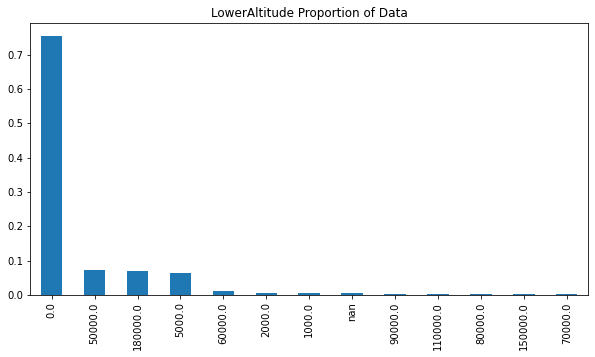

In [32]:
df['LowerAltitude'].value_counts(dropna=False, normalize=True).plot(kind='bar', 
                                                                    title='LowerAltitude Proportion of Data',
                                                                    figsize=(10, 5));

#### UpperAltitude
* NOTAM Analysis CSV equivalent seems to be `MAX_ALT`
* Convert to floats
* Majority are `180000.0`, `999000.0`, `50000.0`, and `NaN`, covering 41%, 33%, 17%, and 6% of the data, respectively.
* No other category covers at least 1% of the data
* Repeats
* Includes chart

In [34]:
df['UpperAltitude'] = pd.to_numeric(df['UpperAltitude'])

In [35]:
df['UpperAltitude']

0       50000.0
1      180000.0
2      180000.0
3      180000.0
4      180000.0
         ...   
447    510000.0
448     20000.0
449     10000.0
450     10000.0
451    999000.0
Name: UpperAltitude, Length: 452, dtype: float64

In [36]:
df['UpperAltitude'].value_counts(dropna=False)

180000.0    184
999000.0    149
50000.0      75
NaN          25
500000.0      3
69990.0       2
109990.0      2
35000.0       2
79000.0       2
10000.0       2
800000.0      1
149990.0      1
90000.0       1
70000.0       1
510000.0      1
20000.0       1
Name: UpperAltitude, dtype: int64

In [37]:
df['UpperAltitude'].value_counts(dropna=False, normalize=True).apply(lambda x: '%.5f' % x)

180000.0    0.40708
999000.0    0.32965
50000.0     0.16593
NaN         0.05531
500000.0    0.00664
69990.0     0.00442
109990.0    0.00442
35000.0     0.00442
79000.0     0.00442
10000.0     0.00442
800000.0    0.00221
149990.0    0.00221
90000.0     0.00221
70000.0     0.00221
510000.0    0.00221
20000.0     0.00221
Name: UpperAltitude, dtype: object

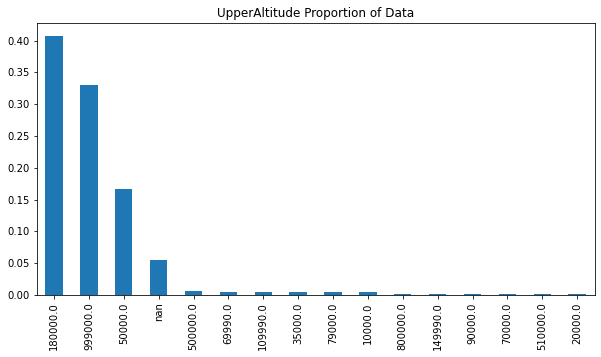

In [38]:
df['UpperAltitude'].value_counts(dropna=False, normalize=True).plot(kind='bar', 
                                                                    title='UpperAltitude Proportion of Data',
                                                                    figsize=(10, 5));

#### IssueTime
* NOTAM Analysis CSV equivalent seems to be `ISSUE_DATE`
* Did not get parsed as dates.
    * Parsed through custom fuction
* All entries from 2016-2020
* Includes chart

In [64]:
from datetime import datetime
def convert_to_date(row):
    try:
        return datetime.strptime(row, '%Y-%m-%d %H:%M:%S')
    except:
        return row
    
def get_year(row):
    try:
        return row.year
    except:
        return row

def get_month(row):
    try:
        return row.month
    except:
        return row
    
def get_day(row):
    try:
        return row.day
    except:
        return row

In [70]:
df['IssueTime'] = df['IssueTime'].apply(convert_to_date)

In [71]:
df['IssueTime'].value_counts(dropna=False)

2016-08-16 12:03:00    7
2019-04-11 09:02:00    5
2019-04-10 15:02:00    4
2017-10-10 15:51:00    3
2019-07-24 12:54:00    3
                      ..
2019-06-09 03:29:00    1
2019-02-19 10:28:00    1
2019-02-19 10:29:00    1
2019-07-24 08:12:00    1
2017-03-01 08:31:00    1
Name: IssueTime, Length: 338, dtype: int64

In [63]:
df['IssueTime'].value_counts(dropna=False, normalize=True).apply(lambda x: '%.5f' % x)

2016-08-16 12:03:00    0.01549
2019-04-11 09:02:00    0.01106
2019-04-10 15:02:00    0.00885
2017-10-10 15:51:00    0.00664
2019-07-24 12:54:00    0.00664
                        ...   
2019-06-09 03:29:00    0.00221
2019-02-19 10:28:00    0.00221
2019-02-19 10:29:00    0.00221
2019-07-24 08:12:00    0.00221
2017-03-01 08:31:00    0.00221
Name: IssueTime, Length: 338, dtype: object

In [73]:
df['IssueTime_YEAR']  = df['IssueTime'].apply(get_year)
df['IssueTime_MONTH'] = df['IssueTime'].apply(get_month)
df['IssueTime_DAY']   = df['IssueTime'].apply(get_day)

In [74]:
df['IssueTime_YEAR'] 

0      2018
1      2018
2      2018
3      2018
4      2018
       ... 
447    2017
448    2017
449    2017
450    2017
451    2017
Name: IssueTime_YEAR, Length: 452, dtype: int64

In [75]:
df['IssueTime_YEAR'].value_counts(dropna=False)

2018    160
2017    127
2016     74
2019     72
2020     19
Name: IssueTime_YEAR, dtype: int64

In [76]:
df['IssueTime_YEAR'].value_counts(dropna=False, normalize=True).apply(lambda x: '%.5f' % x)

2018    0.35398
2017    0.28097
2016    0.16372
2019    0.15929
2020    0.04204
Name: IssueTime_YEAR, dtype: object

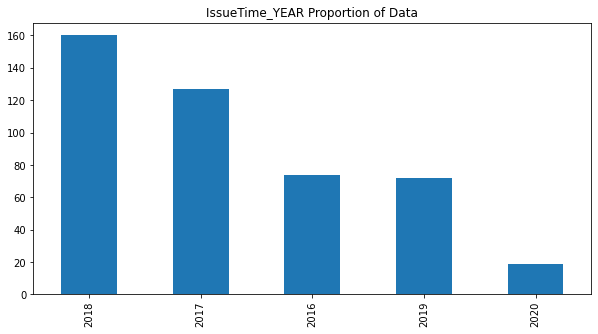

In [77]:
df['IssueTime_YEAR'].value_counts(dropna=False).plot(kind='bar',               
                                                     title='IssueTime_YEAR Proportion of Data',
                                                     figsize=(10, 5));

#### StartTime
* NOTAM Analysis CSV equivalent seems to be `POSSIBLE_START_DATE`
* Did not get parsed as dates.
    * Parsed through custom fuction
* All entries from 2016-2020
* Includes chart

In [79]:
df['StartTime'] = df['StartTime'].apply(convert_to_date)

In [80]:
df['StartTime'].value_counts(dropna=False)

2019-04-11 22:01:00    11
2018-06-29 09:03:00     8
2017-03-01 16:30:00     7
2018-05-11 18:09:00     7
2016-08-17 01:01:00     7
                       ..
2020-03-07 02:45:00     1
2018-10-08 02:06:00     1
2020-05-30 17:11:00     1
2016-05-06 03:16:00     1
2018-04-02 18:22:00     1
Name: StartTime, Length: 132, dtype: int64

In [81]:
df['StartTime'].value_counts(dropna=False, normalize=True).apply(lambda x: '%.5f' % x)

2019-04-11 22:01:00    0.02434
2018-06-29 09:03:00    0.01770
2017-03-01 16:30:00    0.01549
2018-05-11 18:09:00    0.01549
2016-08-17 01:01:00    0.01549
                        ...   
2020-03-07 02:45:00    0.00221
2018-10-08 02:06:00    0.00221
2020-05-30 17:11:00    0.00221
2016-05-06 03:16:00    0.00221
2018-04-02 18:22:00    0.00221
Name: StartTime, Length: 132, dtype: object

In [82]:
df['StartTime_YEAR']  = df['StartTime'].apply(get_year)
df['StartTime_MONTH'] = df['StartTime'].apply(get_month)
df['StartTime_DAY']   = df['StartTime'].apply(get_day)

In [83]:
df['StartTime_YEAR'] 

0      2018
1      2018
2      2018
3      2018
4      2018
       ... 
447    2017
448    2017
449    2017
450    2017
451    2017
Name: StartTime_YEAR, Length: 452, dtype: int64

In [84]:
df['StartTime_YEAR'].value_counts(dropna=False)

2018    160
2017    127
2016     74
2019     72
2020     19
Name: StartTime_YEAR, dtype: int64

In [85]:
df['StartTime_YEAR'].value_counts(dropna=False, normalize=True).apply(lambda x: '%.5f' % x)

2018    0.35398
2017    0.28097
2016    0.16372
2019    0.15929
2020    0.04204
Name: StartTime_YEAR, dtype: object

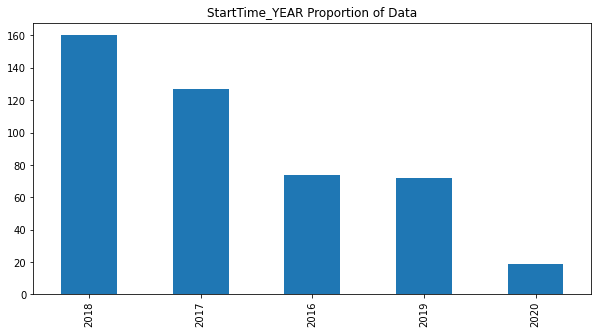

In [97]:
df['StartTime_YEAR'].value_counts(dropna=False).plot(kind='bar',               
                                                     title='StartTime_YEAR Proportion of Data',
                                                     figsize=(10, 5));

#### StopTime
* NOTAM Analysis CSV equivalent seems to be `POSSIBLE_END_DATE`
* Did not get parsed as dates.
    * Parsed through custom fuction
* All entries from 2016-2020
* Includes chart

In [88]:
df['StopTime'] = df['StopTime'].apply(convert_to_date)

In [89]:
df['StopTime'].value_counts(dropna=False)

2016-08-17 01:30:00    18
2017-05-01 13:54:00    12
2016-08-19 06:23:00    11
2019-07-25 22:33:00    10
2017-10-12 01:46:00    10
                       ..
2018-05-12 01:09:00     1
2019-04-11 23:30:00     1
2017-03-01 19:30:00     1
2017-03-01 21:00:00     1
2017-06-06 23:00:00     1
Name: StopTime, Length: 80, dtype: int64

In [91]:
df['StopTime'].value_counts(dropna=False, normalize=True).apply(lambda x: '%.5f' % x)

2016-08-17 01:30:00    0.03982
2017-05-01 13:54:00    0.02655
2016-08-19 06:23:00    0.02434
2019-07-25 22:33:00    0.02212
2017-10-12 01:46:00    0.02212
                        ...   
2018-05-12 01:09:00    0.00221
2019-04-11 23:30:00    0.00221
2017-03-01 19:30:00    0.00221
2017-03-01 21:00:00    0.00221
2017-06-06 23:00:00    0.00221
Name: StopTime, Length: 80, dtype: object

In [92]:
df['StopTime_YEAR']  = df['StopTime'].apply(get_year)
df['StopTime_MONTH'] = df['StopTime'].apply(get_month)
df['StopTime_DAY']   = df['StopTime'].apply(get_day)

In [93]:
df['StopTime_YEAR'] 

0      2018
1      2018
2      2018
3      2018
4      2018
       ... 
447    2017
448    2017
449    2017
450    2017
451    2017
Name: StopTime_YEAR, Length: 452, dtype: int64

In [94]:
df['StopTime_YEAR'].value_counts(dropna=False)

2018    160
2017    127
2016     74
2019     72
2020     19
Name: StopTime_YEAR, dtype: int64

In [95]:
df['StopTime_YEAR'].value_counts(dropna=False, normalize=True).apply(lambda x: '%.5f' % x)

2018    0.35398
2017    0.28097
2016    0.16372
2019    0.15929
2020    0.04204
Name: StopTime_YEAR, dtype: object

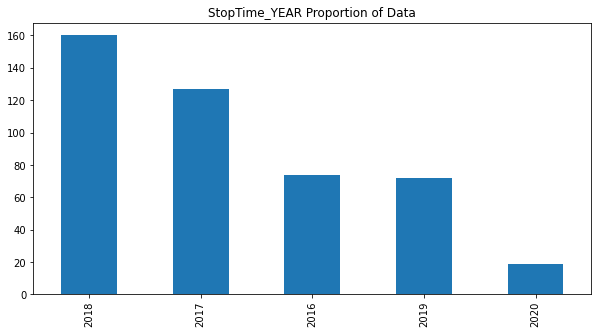

In [98]:
df['StopTime_YEAR'].value_counts(dropna=False).plot(kind='bar',               
                                                    title='StopTime_YEAR Proportion of Data',
                                                    figsize=(10, 5));

#### ADDED: POSSIBLE_DURATION
* All but one duration are in minutes
* One duratoin lasted for over 97 days
    * Could be an anomally?
* Some repeats
* No entry accounts for more than 4% of the data

In [99]:
df['POSSIBLE_DURATION'] = df['StopTime'] - df['StartTime']

In [100]:
df['POSSIBLE_DURATION'] 

0      0 days 02:46:00
1      0 days 01:16:00
2      0 days 01:16:00
3      0 days 01:16:00
4      0 days 01:16:00
            ...       
447    0 days 06:45:00
448    0 days 07:00:00
449    0 days 07:00:00
450    0 days 07:00:00
451   97 days 06:30:00
Name: POSSIBLE_DURATION, Length: 452, dtype: timedelta64[ns]

In [101]:
df['POSSIBLE_DURATION'].value_counts(dropna=False)

0 days 01:10:00     17
0 days 03:02:00     16
0 days 05:27:00     14
0 days 01:45:00     13
0 days 02:40:00     12
                    ..
0 days 02:41:00      1
0 days 01:29:00      1
0 days 04:01:00      1
0 days 03:14:00      1
97 days 06:30:00     1
Name: POSSIBLE_DURATION, Length: 115, dtype: int64

In [102]:
df['POSSIBLE_DURATION'].value_counts(dropna=False, normalize=True).apply(lambda x: '%.5f' % x)

0 days 01:10:00     0.03761
0 days 03:02:00     0.03540
0 days 05:27:00     0.03097
0 days 01:45:00     0.02876
0 days 02:40:00     0.02655
                     ...   
0 days 02:41:00     0.00221
0 days 01:29:00     0.00221
0 days 04:01:00     0.00221
0 days 03:14:00     0.00221
97 days 06:30:00    0.00221
Name: POSSIBLE_DURATION, Length: 115, dtype: object

#### E_CODE
* NOTAM Analysis CSV equivalent is to be `E_CODE`
* `W497A ACT` represents 16% of the data
* A few other categories represent >1% of the data
* Includes chart

In [103]:
df['E_CODE']

0                                 WARNING AREA W497A ACT
1      FL..AIRSPACE CAPE CANAVERAL FL..TEMPORARY FLT ...
2      FL..AIRSPACE CAPE CANAVERAL FL..TEMPORARY FLT ...
3      CAPE CANAVERAL FL..TEMPORARY FLT  RESTRICTION....
4      TEMPORARY FLT RESTRICTION.  PURSUANT TO 14 CFR...
                             ...                        
447    STNR ALT RESERVATION BASS WI AN AREA DEFINED A...
448    LGR58 (KOTRONI 2) AIP GREECE ENR 5.1-5 REF. PE...
449    LGR58 (KOTRONI 1) AIP GREECE ENR 5.1-5 REF. PE...
450    LGR59 (MANTILI) AIP GREECE ENR 5.1-5 REF. PERI...
451                                VOR BDT 114.9MHZ U/S 
Name: E_CODE, Length: 452, dtype: object

In [104]:
df['E_CODE'].value_counts(dropna=False)

W497A ACT                                                                                        74
AIRSPACE R2934 ACT SFC-UNL                                                                       31
AIRSPACE R2933 ACT 5000FT-UNL                                                                    29
FL..AIRSPACE CAPE CANAVERAL FL..TEMPORARY FLT  RESTRICTION. PURSUANT TO 14 CFR SECTION 91.143    23
FL..AIRSPACE KENNEDY SPACE CENTER                                                                21
                                                                                                 ..
KENNEDY SPACE CENTER SPACE OPERATIONS  AREA                                                       1
KENNEDY SPACE CENTER SPACE OPERATIONS AREA                                                        1
FL..AIRSPACE KENNEDY SPACE CENTER SPACE OPERATIONS AREA                                           1
F..AIRSPACE KENNEDY SPACE CENTER SPACE OPERATIONS AREA                                            1


In [105]:
df['E_CODE'].value_counts(dropna=False, normalize=True).apply(lambda x: '%.5f' % x)

W497A ACT                                                                                        0.16372
AIRSPACE R2934 ACT SFC-UNL                                                                       0.06858
AIRSPACE R2933 ACT 5000FT-UNL                                                                    0.06416
FL..AIRSPACE CAPE CANAVERAL FL..TEMPORARY FLT  RESTRICTION. PURSUANT TO 14 CFR SECTION 91.143    0.05088
FL..AIRSPACE KENNEDY SPACE CENTER                                                                0.04646
                                                                                                  ...   
KENNEDY SPACE CENTER SPACE OPERATIONS  AREA                                                      0.00221
KENNEDY SPACE CENTER SPACE OPERATIONS AREA                                                       0.00221
FL..AIRSPACE KENNEDY SPACE CENTER SPACE OPERATIONS AREA                                          0.00221
F..AIRSPACE KENNEDY SPACE CENTER SPACE OPERATIONS AREA 

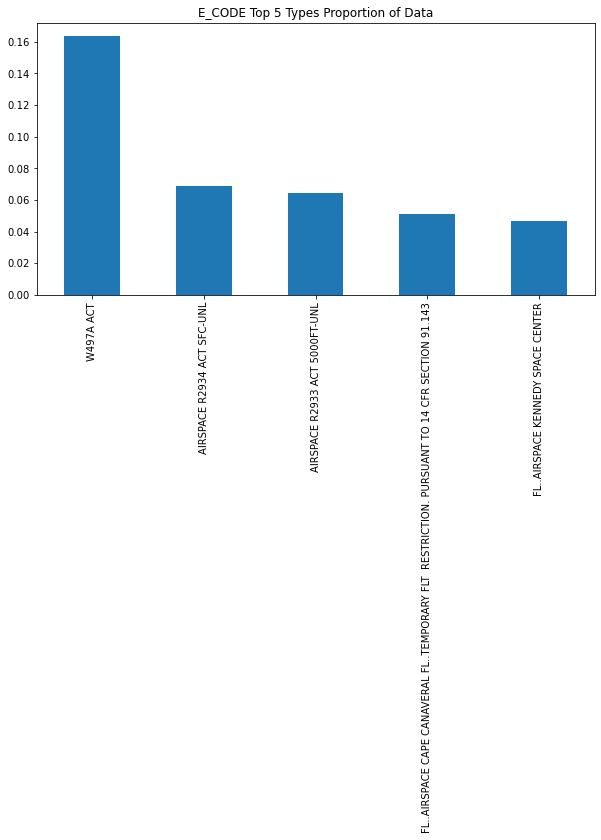

In [106]:
df['E_CODE'].value_counts(dropna=False, normalize=True).nlargest(5).plot(kind='bar',            
                                                                         title='E_CODE Top 5 Types Proportion of Data',           
                                                                         figsize=(10, 5));

### No header categories
* Perhaps these could be merged into a preceding field?

#### 0_no_header
* None as biggest category, with 58% of the data
* A few other categories represent >1% of the data
* Long strings, codes
* Repeats
* Includes chart

In [107]:
df['0_no_header']

0                                                   None
1       FLT LIMITATION IN  THE PROXIMITY OF SPACE FLT...
2       FLT LIMITATION IN  THE PROXIMITY OF SPACE FLT...
3       FLT LIMITATION IN  THE PROXIMITY OF SPACE FLT...
4       FLT LIMITATION IN  THE PROXIMITY OF SPACE FLT...
                             ...                        
447                                                 None
448                                                 None
449                                                 None
450                                                 None
451                                                 None
Name: 0_no_header, Length: 452, dtype: object

In [108]:
df['0_no_header'].value_counts(dropna=False)

None                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 260
 FLT LIMITATION IN  THE PROXIMITY OF SPACE FLT OPS                                                                                                                                                                                                                                                                                                                                                                                                                             

In [109]:
df['0_no_header'].value_counts(dropna=False, normalize=True).apply(lambda x: '%.5f' % x)

None                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 0.57522
 FLT LIMITATION IN  THE PROXIMITY OF SPACE FLT OPS                                                                                                                                                                                                                                                                                                                                                                                                                         

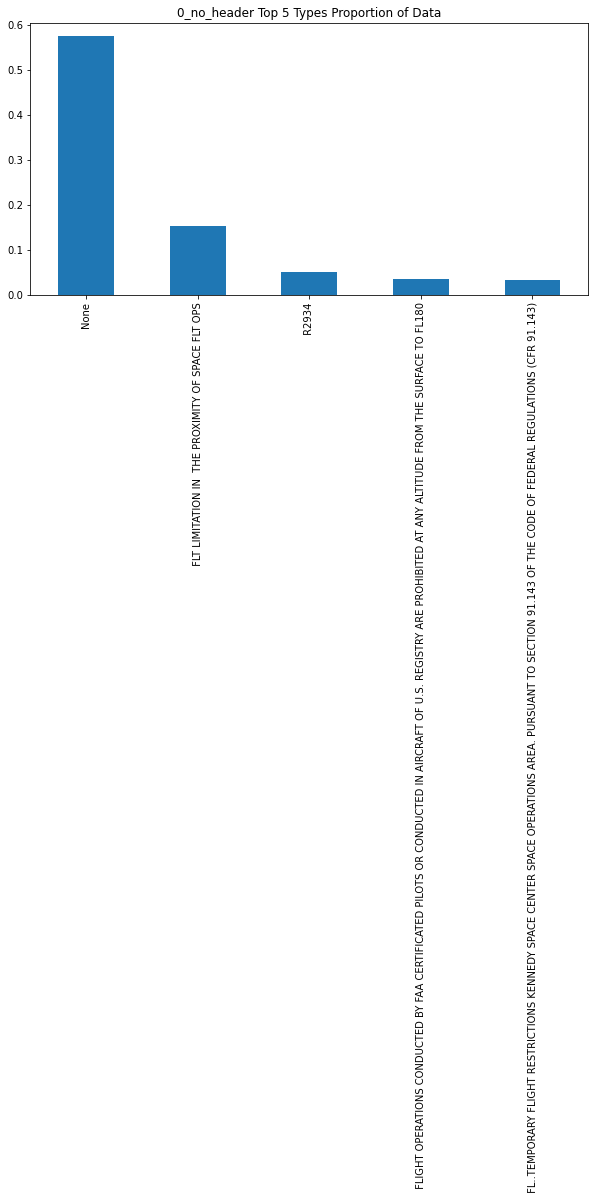

In [114]:
df['0_no_header'].value_counts(dropna=False, normalize=True).nlargest(5).plot(kind='bar',            
                                                                              title='0_no_header Top 5 Types Proportion of Data',           
                                                                              figsize=(10, 5));

#### 1_no_header
* None as biggest category, with 58% of the data
* A few other categories represent >1% of the data
* Long strings, codes
* Repeats
* Includes chart

In [111]:
df['1_no_header']

0                                                   None
1       OPS BY FAA CERT PILOTS OR U.S.REG ACFT ARE PR...
2       OPS BY FAA CERT PILOTS OR U.S.REG ACFT ARE PR...
3       OPS BY FAA CERT PILOTS OR U.S.REG ACFT ARE PR...
4       OPS BY FAA CERT PILOTS OR U.S.REG ACFT ARE PR...
                             ...                        
447                                                 None
448                                                 None
449                                                 None
450                                                 None
451                                                 None
Name: 1_no_header, Length: 452, dtype: object

In [112]:
df['1_no_header'].value_counts(dropna=False)

None                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                263
 OPS BY FAA CERT PILOTS OR U.S.REG ACFT ARE PROHIBITED WI AN AREA DEFINED AS 285116N0804219W (OMN141034.4) TO 290730N0803000W (OMN108033.9) THEN CLOCKWISE VIA A  30 NM ARC CENTERED AT 283703N0803647W (OMN147048.7) TO 281330N0801600W (OMN145078.4) TO 282501

In [113]:
df['1_no_header'].value_counts(dropna=False, normalize=True).apply(lambda x: '%.5f' % x)

None                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                0.58186
 OPS BY FAA CERT PILOTS OR U.S.REG ACFT ARE PROHIBITED WI AN AREA DEFINED AS 285116N0804219W (OMN141034.4) TO 290730N0803000W (OMN108033.9) THEN CLOCKWISE VIA A  30 NM ARC CENTERED AT 283703N0803647W (OMN147048.7) TO 281330N0801600W (OMN145078.4) TO 28

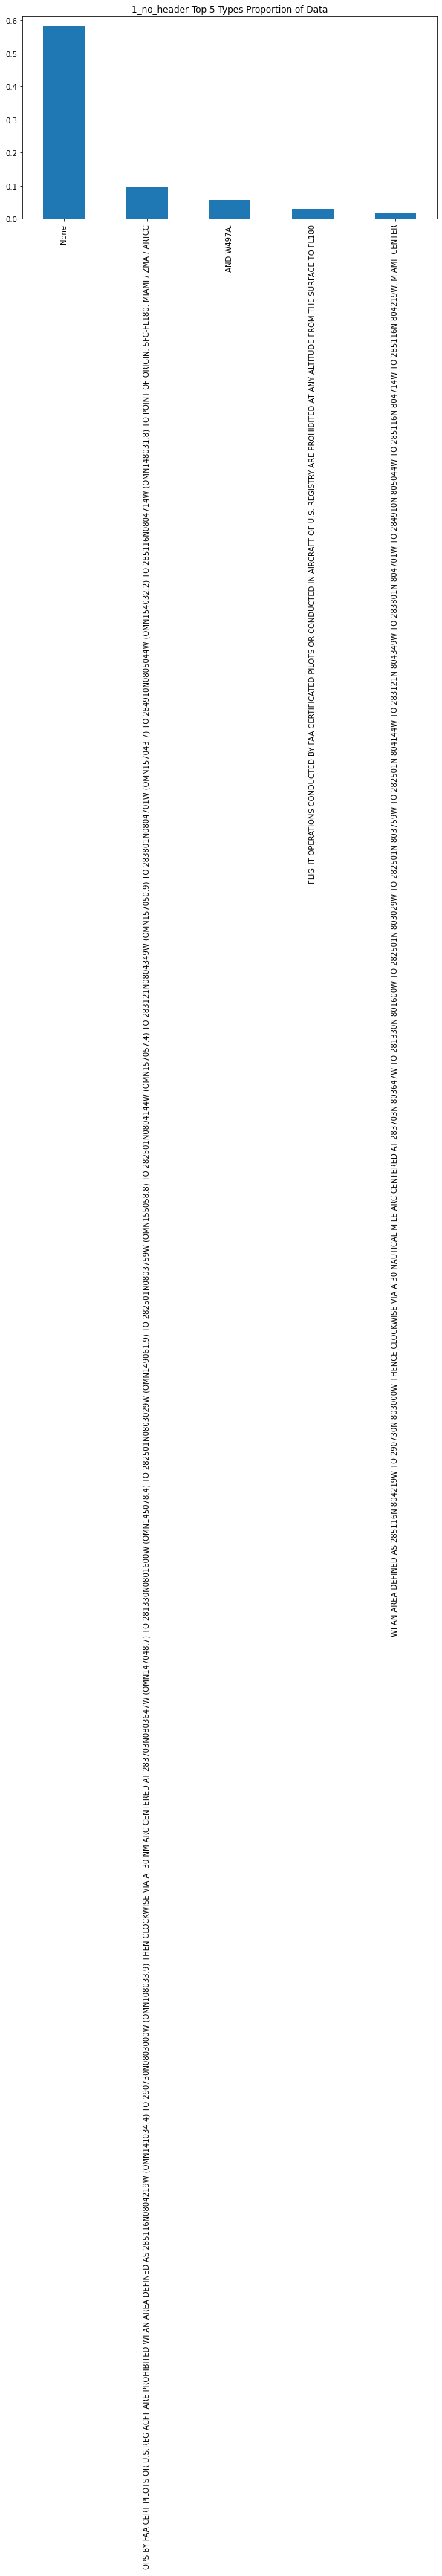

In [115]:
df['1_no_header'].value_counts(dropna=False, normalize=True).nlargest(5).plot(kind='bar',            
                                                                              title='1_no_header Top 5 Types Proportion of Data',           
                                                                              figsize=(10, 5));

#### 2_no_header
* None as biggest category, with 64% of the data
* A few other categories represent >1% of the data
* Telephone numbers, strings, codes
* Repeats
* Includes chart

In [116]:
df['2_no_header']

0                     None
1       PHONE 305-716-1589
2       PHONE 305-716-1589
3       PHONE 305-716-1589
4       PHONE 305-716-1589
              ...         
447                   None
448                   None
449                   None
450                   None
451                   None
Name: 2_no_header, Length: 452, dtype: object

In [117]:
df['2_no_header'].value_counts(dropna=False)

None                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 289
 PHONE 305-716-1589                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [118]:
df['2_no_header'].value_counts(dropna=False, normalize=True).apply(lambda x: '%.5f' % x)

None                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 0.63938
 PHONE 305-716-1589                                                                                                                                                                                                                                                                                                                                                                                                                                                        

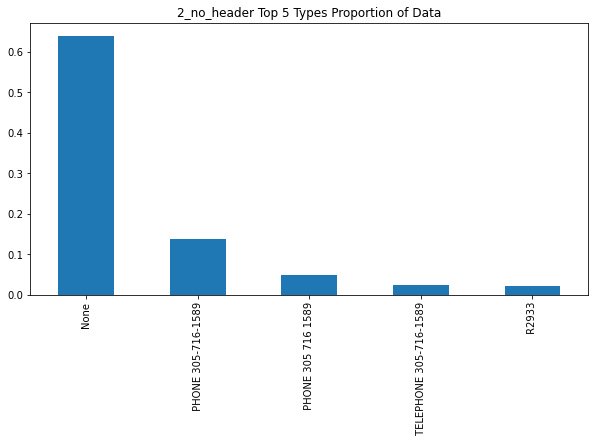

In [119]:
df['2_no_header'].value_counts(dropna=False, normalize=True).nlargest(5).plot(kind='bar',            
                                                                              title='2_no_header Top 5 Types Proportion of Data',           
                                                                              figsize=(10, 5));

#### 3_no_header
* None as biggest category, with 64% of the data
* A few other categories represent >1% of the data
* Telephone numbers, strings, codes
* Repeats
* Includes chart

In [120]:
df['3_no_header']

0                                                   None
1       IS THE FAA COORDINATION FACILITY. THIS AREA E...
2       IS THE FAA COORDINATION FACILITY. THIS AREA E...
3       IS THE FAA COORDINATION FACILITY. THIS AREA E...
4       IS THE FAA COORDINATION FACILITY. THIS AREA E...
                             ...                        
447                                                 None
448                                                 None
449                                                 None
450                                                 None
451                                                 None
Name: 3_no_header, Length: 452, dtype: object

In [121]:
df['3_no_header'].value_counts(dropna=False)

None                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    291
 IS THE FAA COORDINATION FACILITY. THIS AREA ENCOMPASSES R2932                                                                                                                                                                                                                                                                                                                                                                                                                              

In [122]:
df['3_no_header'].value_counts(dropna=False, normalize=True).apply(lambda x: '%.5f' % x)

None                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    0.64381
 IS THE FAA COORDINATION FACILITY. THIS AREA ENCOMPASSES R2932                                                                                                                                                                                                                                                                                                                                                                                                                          

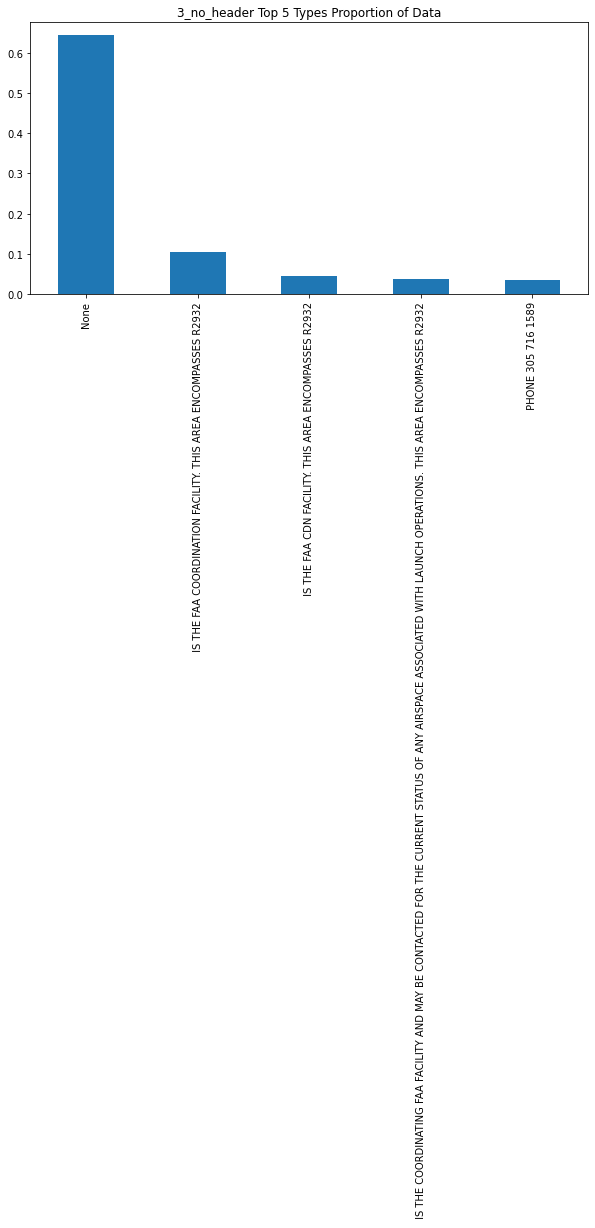

In [123]:
df['3_no_header'].value_counts(dropna=False, normalize=True).nlargest(5).plot(kind='bar',            
                                                                              title='3_no_header Top 5 Types Proportion of Data',           
                                                                              figsize=(10, 5));

#### 4_no_header
* None as biggest category, with 65% of the data
* A few other categories represent >1% of the data
* Strings, codes
* Repeats
* Includes chart

In [124]:
df['4_no_header']

0        None
1       R2933
2       R2933
3       R2933
4       R2933
        ...  
447      None
448      None
449      None
450      None
451      None
Name: 4_no_header, Length: 452, dtype: object

In [125]:
df['4_no_header'].value_counts(dropna=False)

None                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                293
 R2933                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [126]:
df['4_no_header'].value_counts(dropna=False, normalize=True).apply(lambda x: '%.5f' % x)

None                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                0.64823
 R2933                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

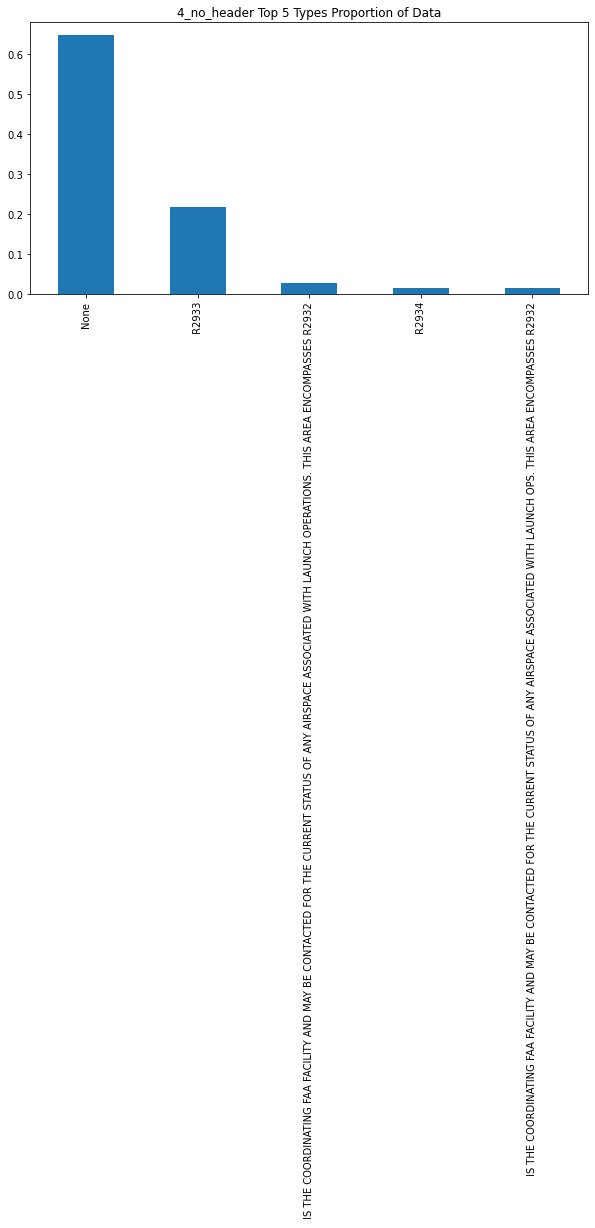

In [127]:
df['4_no_header'].value_counts(dropna=False, normalize=True).nlargest(5).plot(kind='bar',            
                                                                              title='4_no_header Top 5 Types Proportion of Data',           
                                                                              figsize=(10, 5));

#### 5_no_header
* None as biggest category, with 65% of the data
* A few other categories represent >1% of the data
* Strings, codes
* Repeats
* Includes chart

In [128]:
df['5_no_header']

0        None
1       R2934
2       R2934
3       R2934
4       R2934
        ...  
447      None
448      None
449      None
450      None
451      None
Name: 5_no_header, Length: 452, dtype: object

In [129]:
df['5_no_header'].value_counts(dropna=False)

None                                               294
 R2934                                              99
 R2933                                              35
 AND PORTIONS OF W497A                               7
 W137G                                               7
 5000MSL-UNL EFF: 1705011025 - 1705011354 R2934      3
 W136F                                               2
 AR15                                                1
 SFC-FL180 EFF: 1801312048 - 1802010037 R2933        1
 SFC-FL180 EFF: 1710150658- 1710150938 R2933         1
 SFC-FL180 EFF: 1710112218- 1710120146 R2933         1
     R2934                                           1
Name: 5_no_header, dtype: int64

In [130]:
df['5_no_header'].value_counts(dropna=False, normalize=True).apply(lambda x: '%.5f' % x)

None                                               0.65044
 R2934                                             0.21903
 R2933                                             0.07743
 AND PORTIONS OF W497A                             0.01549
 W137G                                             0.01549
 5000MSL-UNL EFF: 1705011025 - 1705011354 R2934    0.00664
 W136F                                             0.00442
 AR15                                              0.00221
 SFC-FL180 EFF: 1801312048 - 1802010037 R2933      0.00221
 SFC-FL180 EFF: 1710150658- 1710150938 R2933       0.00221
 SFC-FL180 EFF: 1710112218- 1710120146 R2933       0.00221
     R2934                                         0.00221
Name: 5_no_header, dtype: object

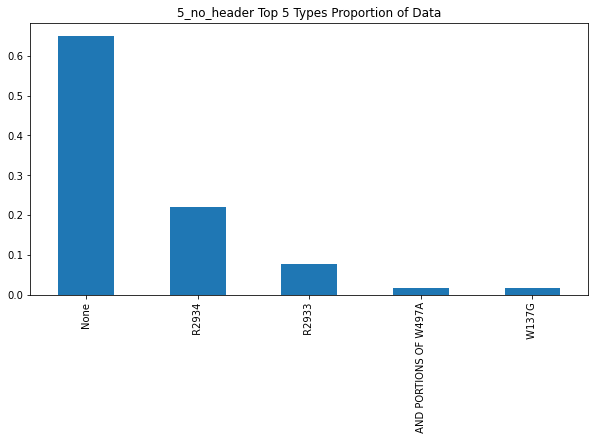

In [131]:
df['5_no_header'].value_counts(dropna=False, normalize=True).nlargest(5).plot(kind='bar',            
                                                                              title='5_no_header Top 5 Types Proportion of Data',           
                                                                              figsize=(10, 5));

#### 6_no_header
* None as biggest category, with 65% of the data
* A few other categories represent >1% of the data
* Strings, codes
* Repeats
* Includes chart

In [132]:
df['6_no_header']

0                        None
1       AND PORTIONS OF W137F
2       AND PORTIONS OF W137F
3       AND PORTIONS OF W137F
4       AND PORTIONS OF W137F
                ...          
447                      None
448                      None
449                      None
450                      None
451                      None
Name: 6_no_header, Length: 452, dtype: object

In [133]:
df['6_no_header'].value_counts(dropna=False)

None                                                                                                                                                                                                           294
 AND PORTIONS OF W137F                                                                                                                                                                                          66
 R2934                                                                                                                                                                                                          35
 AND PORTIONS OF W497A                                                                                                                                                                                          32
 W136F                                                                                                                                                      

In [134]:
df['6_no_header'].value_counts(dropna=False, normalize=True).apply(lambda x: '%.5f' % x)

None                                                                                                                                                                                                           0.65044
 AND PORTIONS OF W137F                                                                                                                                                                                         0.14602
 R2934                                                                                                                                                                                                         0.07743
 AND PORTIONS OF W497A                                                                                                                                                                                         0.07080
 W136F                                                                                                                                      

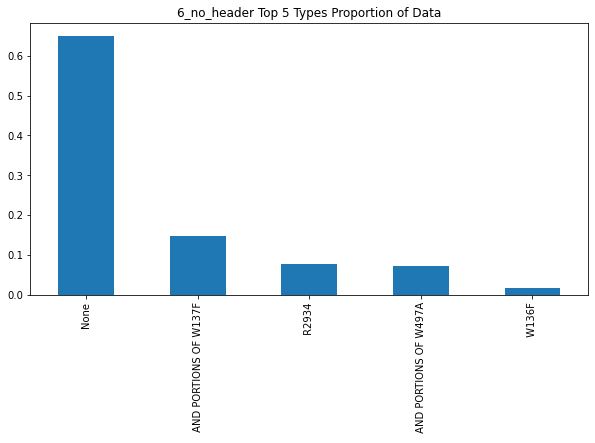

In [135]:
df['6_no_header'].value_counts(dropna=False, normalize=True).nlargest(5).plot(kind='bar',            
                                                                              title='6_no_header Top 5 Types Proportion of Data',           
                                                                              figsize=(10, 5));

#### 7_no_header
* None as biggest category, with 66% of the data
* A few other categories represent >1% of the data
* Strings, codes, phone numbers
* Repeats
* Includes chart

In [136]:
df['7_no_header']

0        None
1       W137G
2       W137G
3       W137G
4       W137G
        ...  
447      None
448      None
449      None
450      None
451      None
Name: 7_no_header, Length: 452, dtype: object

In [137]:
df['7_no_header'].value_counts(dropna=False)

None                                                                                                                                                                                                                           297
 W137G                                                                                                                                                                                                                          68
 W136F                                                                                                                                                                                                                          32
 AND PORTIONS OF W497A                                                                                                                                                                                                          29
 PHONE 305-716-1589                                                                         

In [138]:
df['7_no_header'].value_counts(dropna=False, normalize=True).apply(lambda x: '%.5f' % x)

None                                                                                                                                                                                                                           0.65708
 W137G                                                                                                                                                                                                                         0.15044
 W136F                                                                                                                                                                                                                         0.07080
 AND PORTIONS OF W497A                                                                                                                                                                                                         0.06416
 PHONE 305-716-1589                                                         

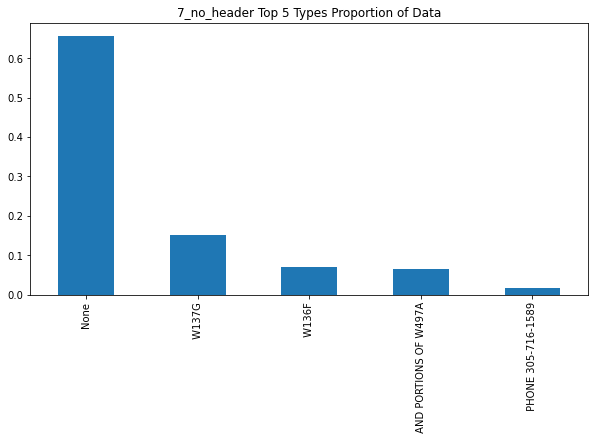

In [139]:
df['7_no_header'].value_counts(dropna=False, normalize=True).nlargest(5).plot(kind='bar',            
                                                                              title='7_no_header Top 5 Types Proportion of Data',           
                                                                              figsize=(10, 5));

#### 8_no_header
* None as biggest category, with 66% of the data
* A few other categories represent >1% of the data
* Strings, codes
* Repeats
* Includes chart

In [140]:
df['8_no_header']

0                                                   None
1       W497A. ADDITIONAL WARNING AND RESTRICTED AREA...
2       W497A. ADDITIONAL WARNING AND RESTRICTED AREA...
3       W497A. ADDITIONAL WARNING AND RESTRICTED AREA...
4       W497A. ADDITIONAL WARNING AND RESTRICTED AREA...
                             ...                        
447                                                 None
448                                                 None
449                                                 None
450                                                 None
451                                                 None
Name: 8_no_header, Length: 452, dtype: object

In [141]:
df['8_no_header'].value_counts(dropna=False)

None                                                                                                                                                                                                                                                300
 W497A. ADDITIONAL WARNING AND RESTRICTED AREAS WILL BE ACT. PILOTS MUST CONSULT ALL NOTAMS REGARDING THIS OP AND MAY CONTACT ZMA FOR CURRENT AIRSPACE STATUS.                                                                                       57
 W136F                                                                                                                                                                                                                                               27
 W137F AND W137G. ADDITIONAL WARNING AND RESTRICTED AREAS WILL BE ACTIVE IN CONJUNCTION WITH THE OPERATIONS. PILOTS SHALL CONSULT ALL NOTAMS REGARDING THIS OPERATION.                                                                               11
 IS THE 

In [142]:
df['8_no_header'].value_counts(dropna=False, normalize=True).apply(lambda x: '%.5f' % x)

None                                                                                                                                                                                                                                                0.66372
 W497A. ADDITIONAL WARNING AND RESTRICTED AREAS WILL BE ACT. PILOTS MUST CONSULT ALL NOTAMS REGARDING THIS OP AND MAY CONTACT ZMA FOR CURRENT AIRSPACE STATUS.                                                                                      0.12611
 W136F                                                                                                                                                                                                                                              0.05973
 W137F AND W137G. ADDITIONAL WARNING AND RESTRICTED AREAS WILL BE ACTIVE IN CONJUNCTION WITH THE OPERATIONS. PILOTS SHALL CONSULT ALL NOTAMS REGARDING THIS OPERATION.                                                                              

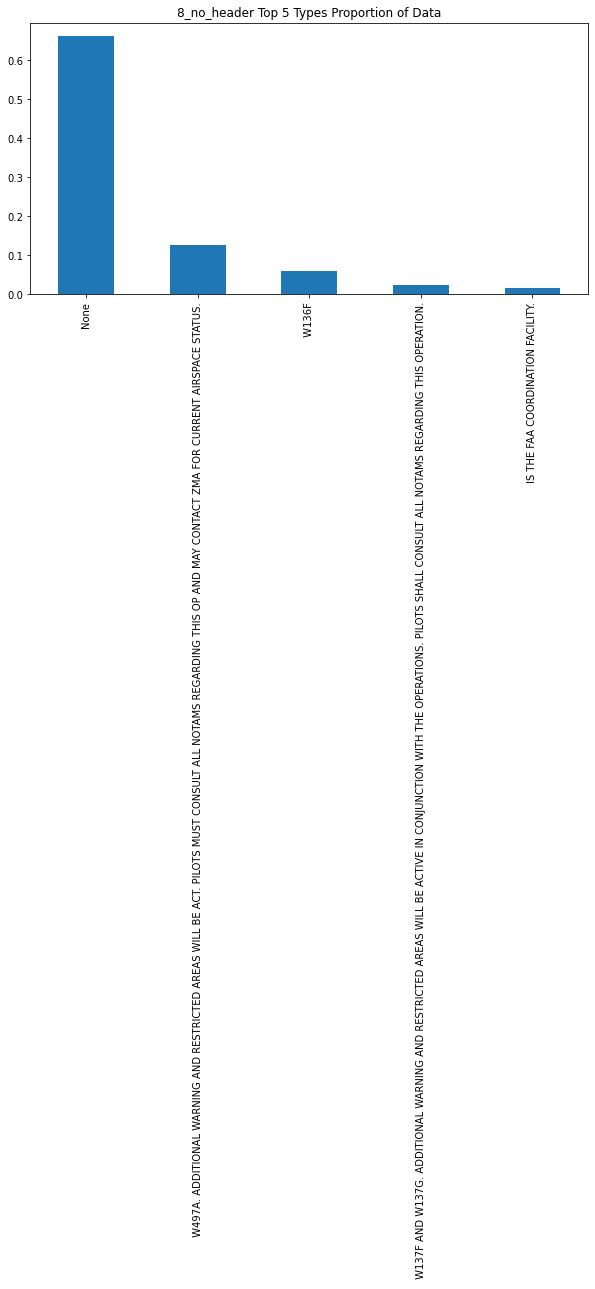

In [143]:
df['8_no_header'].value_counts(dropna=False, normalize=True).nlargest(5).plot(kind='bar',            
                                                                              title='8_no_header Top 5 Types Proportion of Data',           
                                                                              figsize=(10, 5));

#### 9_no_header
* None as biggest category, with 91% of the data
* A few other categories represent >1% of the data
* Strings, codes
* Repeats
* Includes chart

In [144]:
df['9_no_header']

0      None
1      None
2      None
3      None
4      None
       ... 
447    None
448    None
449    None
450    None
451    None
Name: 9_no_header, Length: 452, dtype: object

In [145]:
df['9_no_header'].value_counts(dropna=False)

None                                                                                                                                                                                                                            411
 W137F AND W137G. ADDITIONAL WARNING AND RESTRICTED AREAS WILL BE ACTIVE IN CONJUNCTION WITH THE OPERATIONS. PILOTS SHALL CONSULT ALL NOTAMS REGARDING THIS OPERATION.                                                            7
 W137F AND W137G. ADDITIONAL WARNING AND RESTRICTED AREAS WILL BE ACTIVE IN CONJUNCTION WITH THE OPS. PILOTS SHALL CONSULT ALL NOTAMS REGARDING THIS OPERATION. .                                                                 4
 W137F AND W137G. ADDITIONAL WARNING AND RESTRICTED AREAS WILL BE ACTIVE IN CONJUNCTION WITH THE OPERATIONS. PILOTS SHALL CONSULT ALL NOTAMS REGARDING THIS OPERATION. .                                                          4
 W497A. ADDITIONAL WARNING AND RESTRICTED AREAS WILL BE ACT. PILOTS MUST CONSULT ALL NOT

In [146]:
df['9_no_header'].value_counts(dropna=False, normalize=True).apply(lambda x: '%.5f' % x)

None                                                                                                                                                                                                                            0.90929
 W137F AND W137G. ADDITIONAL WARNING AND RESTRICTED AREAS WILL BE ACTIVE IN CONJUNCTION WITH THE OPERATIONS. PILOTS SHALL CONSULT ALL NOTAMS REGARDING THIS OPERATION.                                                          0.01549
 W137F AND W137G. ADDITIONAL WARNING AND RESTRICTED AREAS WILL BE ACTIVE IN CONJUNCTION WITH THE OPS. PILOTS SHALL CONSULT ALL NOTAMS REGARDING THIS OPERATION. .                                                               0.00885
 W137F AND W137G. ADDITIONAL WARNING AND RESTRICTED AREAS WILL BE ACTIVE IN CONJUNCTION WITH THE OPERATIONS. PILOTS SHALL CONSULT ALL NOTAMS REGARDING THIS OPERATION. .                                                        0.00885
 W497A. ADDITIONAL WARNING AND RESTRICTED AREAS WILL BE ACT. PILOTS MUST

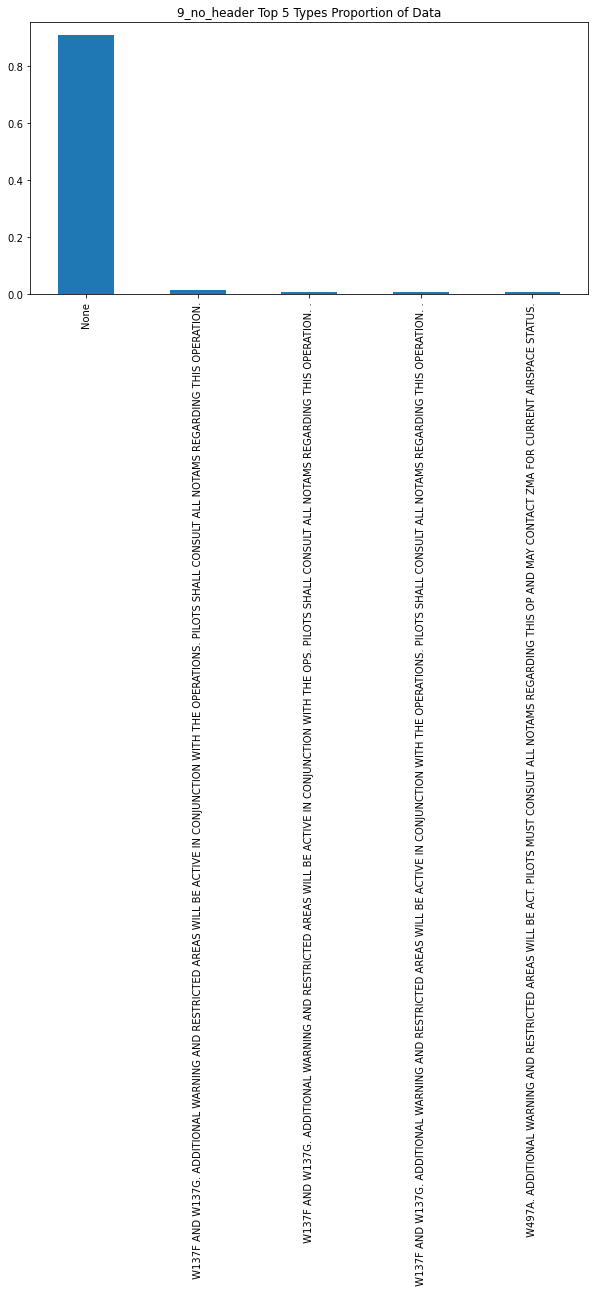

In [147]:
df['9_no_header'].value_counts(dropna=False, normalize=True).nlargest(5).plot(kind='bar',            
                                                                              title='9_no_header Top 5 Types Proportion of Data',           
                                                                              figsize=(10, 5));

#### 10_no_header
* None as biggest category, with >99% of the data
* Only two other categories, both with just a single entry: `GISSH` and `AND W497A. PART 1 OF 3`

In [148]:
df['10_no_header']

0      None
1      None
2      None
3      None
4      None
       ... 
447    None
448    None
449    None
450    None
451    None
Name: 10_no_header, Length: 452, dtype: object

In [149]:
df['10_no_header'].value_counts(dropna=False)

None                        450
 GISSH                        1
 AND W497A. PART 1 OF 3       1
Name: 10_no_header, dtype: int64

In [150]:
df['10_no_header'].value_counts(dropna=False, normalize=True).apply(lambda x: '%.5f' % x)

None                        0.99558
 GISSH                      0.00221
 AND W497A. PART 1 OF 3     0.00221
Name: 10_no_header, dtype: object

#### 11_no_header
* None as biggest category, with >99% of the data
* Otheriwse, `FRWAY` occurs once

In [153]:
df['11_no_header']

0      None
1      None
2      None
3      None
4      None
       ... 
447    None
448    None
449    None
450    None
451    None
Name: 11_no_header, Length: 452, dtype: object

In [154]:
df['11_no_header'].value_counts(dropna=False)

None      451
 FRWAY      1
Name: 11_no_header, dtype: int64

In [155]:
df['11_no_header'].value_counts(dropna=False, normalize=True).apply(lambda x: '%.5f' % x)

None      0.99779
 FRWAY    0.00221
Name: 11_no_header, dtype: object

#### 12_no_header
* None as biggest category, with >99% of the data
* Otheriwse, `TUXXI` occurs once

In [156]:
df['12_no_header']

0      None
1      None
2      None
3      None
4      None
       ... 
447    None
448    None
449    None
450    None
451    None
Name: 12_no_header, Length: 452, dtype: object

In [157]:
df['12_no_header'].value_counts(dropna=False)

None      451
 TUXXI      1
Name: 12_no_header, dtype: int64

In [158]:
df['12_no_header'].value_counts(dropna=False, normalize=True).apply(lambda x: '%.5f' % x)

None      0.99779
 TUXXI    0.00221
Name: 12_no_header, dtype: object

#### 13_no_header
* None as biggest category, with >99% of the data
* Otheriwse, a long string occurs once

In [159]:
df['13_no_header']

0      None
1      None
2      None
3      None
4      None
       ... 
447    None
448    None
449    None
450    None
451    None
Name: 13_no_header, Length: 452, dtype: object

In [160]:
df['13_no_header'].value_counts(dropna=False)

None                                                                                                                                                                                                                                        451
 CAYSL EXPECT OMN J79 TRV AND TRV TRANSITION TO  APPROPRIATE STAR.  HIBAC TRANS. FOR SHFTY STAR CLOSED.  REROUTES FOR &quot;AR&quot; ROUTES WILL BE CONTAINED IN FAA ATC COMMAND CENTER ADVISORY. BECAUSE OF THE INDEFINITE OPENING TIME      1
Name: 13_no_header, dtype: int64

In [161]:
df['13_no_header'].value_counts(dropna=False, normalize=True).apply(lambda x: '%.5f' % x)

None                                                                                                                                                                                                                                        0.99779
 CAYSL EXPECT OMN J79 TRV AND TRV TRANSITION TO  APPROPRIATE STAR.  HIBAC TRANS. FOR SHFTY STAR CLOSED.  REROUTES FOR &quot;AR&quot; ROUTES WILL BE CONTAINED IN FAA ATC COMMAND CENTER ADVISORY. BECAUSE OF THE INDEFINITE OPENING TIME    0.00221
Name: 13_no_header, dtype: object